In [1]:
#Import some extention libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
import xlsxwriter
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn import metrics
from pandas_profiling import ProfileReport
import math
import re
from scipy.optimize import curve_fit
from scipy.stats import zscore
from scipy.stats import stats
from scipy.stats import skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## CHECK/CLEAN THE EXTRACTED DATA SET

In [2]:
USACarsDatasets = pd.read_excel(r"C:\Users\Sales\USACarsDatasets.xlsx")

In [3]:
CJC = USACarsDatasets
CJC

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [4]:
CJC.isnull().any()

Unnamed: 0      False
price           False
brand           False
model           False
year            False
title_status    False
mileage         False
color           False
vin             False
lot             False
state           False
country         False
condition       False
dtype: bool

In [5]:
CJC.shape

(2499, 13)

In [6]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [7]:
profile = ProfileReport(CJC,title='USA Cars Sales Data',html={'style': {'full_width':True}})

In [8]:
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
corr = CJC.corr()

corr

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1.000000,0.098417,0.244921,-0.129258,0.012577
price,0.098417,1.000000,0.418274,-0.400838,0.159369
year,0.244921,0.418274,1.000000,-0.594686,0.164582
mileage,-0.129258,-0.400838,-0.594686,1.000000,-0.130475
lot,0.012577,0.159369,0.164582,-0.130475,1.000000


## PRE-POCESSING THE DATA

In [10]:
CJC.drop(['Unnamed: 0','vin','country'],axis=1,inplace=True)
CJC.head()

,price,brand,model,year,title_status,mileage,color,lot,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,159348797,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,166951262,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,167655728,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,167753855,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,167763266,florida,22 hours left


In [11]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2499 non-null   int64 
 1   brand         2499 non-null   object
 2   model         2499 non-null   object
 3   year          2499 non-null   int64 
 4   title_status  2499 non-null   object
 5   mileage       2499 non-null   int64 
 6   color         2499 non-null   object
 7   lot           2499 non-null   int64 
 8   state         2499 non-null   object
 9   condition     2499 non-null   object
dtypes: int64(4), object(6)
memory usage: 195.4+ KB


## ENCODING THE DATA

In [12]:
CJC = pd.get_dummies(CJC,drop_first=True)
CJC.head()

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,6300,2008,274117,159348797,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552,166951262,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5350,2018,39590,167655728,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146,167753855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654,167763266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
CJC_x = CJC.drop('price',axis=1)

## CHECK AND REMOVE OUTLIERS IN PRICE COLUMN (IF ANY)

## Option -1

In [14]:
from scipy.stats import zscore

In [48]:
CJC['Zscore_sp'] = zscore(CJC.price)
CJC[(CJC.Zscore_sp >2.0) | (CJC.Zscore_sp <-2.0)]

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
44,55000,2017,15273,167754310,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.991028
49,54000,2017,26241,167754311,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.908477
95,53500,2017,29355,167765095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.867201
122,47500,2017,26562,167765120,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.371893
127,53000,2018,16105,167765123,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.825925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,59900,2020,2162,167762991,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.395530
2196,50500,2018,74961,167749685,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.619547
2198,55000,2018,37245,167749686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.991028
2200,56000,2018,25371,167749689,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.073579


{'whiskers': [<matplotlib.lines.Line2D at 0x250001ec6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x250001ecd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x250001ec340>],
 'medians': [<matplotlib.lines.Line2D at 0x250001f8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x250001f8700>],
 'means': []}

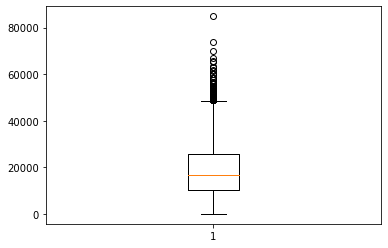

In [49]:
plt.boxplot(CJC['price'])

In [51]:
CJCk_No_Outlier = CJC[(CJC.Zscore_sp <2.0) & (CJC.Zscore_sp >-2.0)]
CJCk_No_Outlier

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
0,6300,2008,274117,159348797,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.029223
1,2899,2011,190552,166951262,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1.309980
2,5350,2018,39590,167655728,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.107647
3,25000,2014,64146,167753855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.514487
4,27700,2018,6654,167763266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.737376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609,167722715,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.905396
2495,9200,2018,34553,167762225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2496,9200,2018,31594,167762226,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2497,9200,2018,32557,167762227,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824


In [52]:
CJCk_No_Outlier.shape

(2381, 296)

In [53]:
CJC.shape[0] - CJCk_No_Outlier.shape[0]

118

{'whiskers': [<matplotlib.lines.Line2D at 0x25000241c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2500024d340>,
 'boxes': [<matplotlib.lines.Line2D at 0x250002418b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2500024da00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2500024dd60>],
 'means': []}

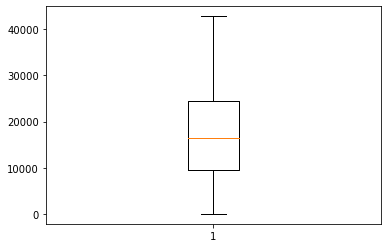

In [54]:
plt.boxplot(CJCk_No_Outlier['price'])

In [55]:
CJCkx_No_Outlier = CJCk_No_Outlier.drop(['price','Zscore_sp'],axis=1)
CJCkx_No_Outlier

,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,2008,274117,159348797,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,190552,166951262,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,39590,167655728,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2014,64146,167753855,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,6654,167763266,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2019,23609,167722715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,2018,34553,167762225,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,2018,31594,167762226,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,2018,32557,167762227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Option -2

In [56]:
from scipy.stats import norm

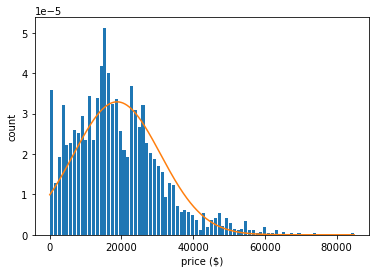

In [57]:
plt.hist(CJC.price, bins=80, rwidth=0.8, density=True)
plt.xlabel('price ($)')
plt.ylabel('count')

rng = np.arange(CJC.price.min(), CJC.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,CJC.price.mean(), CJC.price.std()))

In [58]:
CJC.price.mean()

18767.671468587436

In [59]:
CJC.price.std()

12116.094935650759

In [60]:
upper_limit = CJC.price.mean() + 4*CJC.price.std()
upper_limit

67232.05121119047

In [61]:
lower_limit = CJC.price.mean() - 1.5*CJC.price.std()
lower_limit

593.5290651112991

In [62]:
CJC[(CJC.price>upper_limit) | (CJC.price<lower_limit)]

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
141,0,2008,177948,167756157,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
144,0,2014,123660,167756167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
188,175,2000,231240,167756464,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1.534850
196,0,2017,76858,167656523,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
206,25,2020,7232,167756877,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1.547233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,25,2010,149189,167650663,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1.547233
545,0,1993,0,167358601,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
1336,70000,2019,9643,167780680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.229299
1340,74000,2019,10536,167780682,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.559504


In [63]:
CJC_No_Outlier = CJC[(CJC.price<upper_limit) & (CJC.price>lower_limit)]
CJC_No_Outlier

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
0,6300,2008,274117,159348797,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.029223
1,2899,2011,190552,166951262,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1.309980
2,5350,2018,39590,167655728,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.107647
3,25000,2014,64146,167753855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.514487
4,27700,2018,6654,167763266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.737376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609,167722715,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.905396
2495,9200,2018,34553,167762225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2496,9200,2018,31594,167762226,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2497,9200,2018,32557,167762227,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824


In [64]:
CJC_No_Outlier.shape

(2419, 296)

In [65]:
CJC.shape[0] - CJC_No_Outlier.shape[0]

80

{'whiskers': [<matplotlib.lines.Line2D at 0x25003651130>,
 'caps': [<matplotlib.lines.Line2D at 0x250036517f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25003641d60>],
 'medians': [<matplotlib.lines.Line2D at 0x25003651eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2500365a250>],
 'means': []}

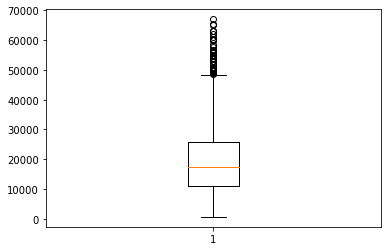

In [66]:
plt.boxplot(CJC_No_Outlier['price'])

## Note: Option 1 is selected (with 25 outliers removed) to complete my model

### Cheking for Multicollinearity

In [67]:
corr = CJCkx_No_Outlier.corr()

corr

,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
year,1.000000,-0.592337,0.163261,-0.063187,-0.061546,-0.013482,-0.034695,-0.117105,-0.046386,0.088003,...,-0.003206,-0.015453,0.059068,-0.001078,-0.007047,-0.014317,-0.018909,-0.087183,0.000309,0.003114
mileage,-0.592337,1.000000,-0.127287,0.043543,-0.002502,-0.019227,-0.012144,0.079110,0.027799,-0.068482,...,0.007103,0.023361,-0.044455,0.019187,-0.022699,0.018707,0.015005,0.017367,-0.008861,-0.001015
lot,0.163261,-0.127287,1.000000,-0.039501,0.016803,0.025457,0.019631,0.133889,0.014042,0.018047,...,-0.066255,-0.011944,-0.025615,0.025590,-0.144676,0.000307,-0.130074,-0.087371,0.016655,0.036662
brand_audi,-0.063187,0.043543,-0.039501,1.000000,-0.003266,-0.003039,-0.002527,-0.015157,-0.003580,-0.019122,...,-0.003374,-0.000841,-0.005946,-0.002920,-0.005497,-0.002228,-0.007698,-0.006482,-0.001457,-0.003479
brand_bmw,-0.061546,-0.002502,0.016803,-0.003266,1.000000,-0.005900,-0.004905,-0.029419,-0.006949,-0.037115,...,-0.006549,-0.001632,-0.011542,-0.005667,-0.010670,-0.004324,-0.014942,-0.012581,-0.002828,-0.006752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
condition_7 hours left,-0.014317,0.018707,0.000307,-0.002228,-0.004324,-0.004023,-0.003345,0.027660,-0.004739,0.015204,...,-0.004466,-0.001113,-0.007871,-0.003865,-0.007276,1.000000,-0.010190,-0.008580,-0.001929,-0.004605
condition_8 days left,-0.018909,0.015005,-0.130074,-0.007698,-0.014942,-0.013905,-0.011560,-0.062211,-0.016379,0.136384,...,-0.015436,-0.003847,-0.027203,-0.013356,-0.025147,-0.010190,1.000000,-0.029653,-0.006666,-0.015914
condition_9 days left,-0.087183,0.017367,-0.087371,-0.006482,-0.012581,0.025263,0.034663,-0.050002,-0.013791,-0.066540,...,-0.012997,-0.003239,-0.022905,-0.011246,-0.021174,-0.008580,-0.029653,1.000000,-0.005612,-0.013400
condition_9 minutes,0.000309,-0.008861,0.016655,-0.001457,-0.002828,-0.002632,-0.002188,0.059713,-0.003100,-0.016556,...,-0.002921,-0.000728,-0.005149,-0.002528,-0.004760,-0.001929,-0.006666,-0.005612,1.000000,-0.003012


## TRAIN & TEST MY MODEL

In [68]:
import statsmodels.api as sm

In [69]:
x = sm.add_constant(CJCkx_No_Outlier)
y = CJCk_No_Outlier.iloc[:,0]

In [70]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

In [71]:
corr = CJCkx_No_Outlier.corr()

corr

,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
year,1.000000,-0.592337,0.163261,-0.063187,-0.061546,-0.013482,-0.034695,-0.117105,-0.046386,0.088003,...,-0.003206,-0.015453,0.059068,-0.001078,-0.007047,-0.014317,-0.018909,-0.087183,0.000309,0.003114
mileage,-0.592337,1.000000,-0.127287,0.043543,-0.002502,-0.019227,-0.012144,0.079110,0.027799,-0.068482,...,0.007103,0.023361,-0.044455,0.019187,-0.022699,0.018707,0.015005,0.017367,-0.008861,-0.001015
lot,0.163261,-0.127287,1.000000,-0.039501,0.016803,0.025457,0.019631,0.133889,0.014042,0.018047,...,-0.066255,-0.011944,-0.025615,0.025590,-0.144676,0.000307,-0.130074,-0.087371,0.016655,0.036662
brand_audi,-0.063187,0.043543,-0.039501,1.000000,-0.003266,-0.003039,-0.002527,-0.015157,-0.003580,-0.019122,...,-0.003374,-0.000841,-0.005946,-0.002920,-0.005497,-0.002228,-0.007698,-0.006482,-0.001457,-0.003479
brand_bmw,-0.061546,-0.002502,0.016803,-0.003266,1.000000,-0.005900,-0.004905,-0.029419,-0.006949,-0.037115,...,-0.006549,-0.001632,-0.011542,-0.005667,-0.010670,-0.004324,-0.014942,-0.012581,-0.002828,-0.006752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
condition_7 hours left,-0.014317,0.018707,0.000307,-0.002228,-0.004324,-0.004023,-0.003345,0.027660,-0.004739,0.015204,...,-0.004466,-0.001113,-0.007871,-0.003865,-0.007276,1.000000,-0.010190,-0.008580,-0.001929,-0.004605
condition_8 days left,-0.018909,0.015005,-0.130074,-0.007698,-0.014942,-0.013905,-0.011560,-0.062211,-0.016379,0.136384,...,-0.015436,-0.003847,-0.027203,-0.013356,-0.025147,-0.010190,1.000000,-0.029653,-0.006666,-0.015914
condition_9 days left,-0.087183,0.017367,-0.087371,-0.006482,-0.012581,0.025263,0.034663,-0.050002,-0.013791,-0.066540,...,-0.012997,-0.003239,-0.022905,-0.011246,-0.021174,-0.008580,-0.029653,1.000000,-0.005612,-0.013400
condition_9 minutes,0.000309,-0.008861,0.016655,-0.001457,-0.002828,-0.002632,-0.002188,0.059713,-0.003100,-0.016556,...,-0.002921,-0.000728,-0.005149,-0.002528,-0.004760,-0.001929,-0.006666,-0.005612,1.000000,-0.003012


## REMOVE HIGH INTER-CORRELATED VARIABLES

In [72]:
def correlation(CJCkx_No_Outlier, threshold):
    col_corr = set()
    corr_matrix = CJCkx_No_Outlier.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [73]:
corr_features = correlation(train_x, 0.4)
len(set(corr_features))

48

In [74]:
corr_features

{'brand_ford',
 'brand_peterbilt',
 'brand_toyota',
 'color_color:',
 'color_yellow',
 'condition_10 days left',
 'condition_11 days left',
 'condition_12 days left',
 'condition_14 hours left',
 'condition_15 days left',
 'condition_24 hours left',
 'condition_29 minutes',
 'condition_3 days left',
 'condition_5 days left',
 'condition_7 days left',
 'condition_9 days left',
 'mileage',
 'model_300',
 'model_caravan',
 'model_compass',
 'model_country',
 'model_cruiser',
 'model_door',
 'model_enclave',
 'model_encore',
 'model_esv',
 'model_forte',
 'model_ghibli',
 'model_gle',
 'model_nautilus',
 'model_pacifica',
 'model_pioneer',
 'model_q5',
 'model_series',
 'model_sorento',
 'model_srx',
 'model_sundance',
 'model_truck',
 'model_vans',
 'model_xt5',
 'state_indiana',
 'state_kentucky',
 'state_new hampshire',
 'state_new york',
 'state_rhode island',
 'state_vermont',
 'state_wyoming',
 'title_status_salvage insurance'}

In [75]:
train_x.shape,test_x.shape

((1904, 295), (477, 295))

In [76]:
train_X = train_x.drop(corr_features, axis=1)
train_X

,const,year,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_47 minutes,condition_48 minutes,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 hours left,condition_8 days left,condition_9 minutes,condition_Listing Expired
636,1.0,2017,167779686,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2324,1.0,2018,167750230,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,1.0,2017,167702919,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
605,1.0,2019,167778617,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2270,1.0,2020,167722431,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1994,167361489,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2036,1.0,2017,167744596,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,1.0,2019,167802544,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,1.0,2017,167742134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
test_X = test_x.drop(corr_features, axis=1)
test_X

,const,year,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_47 minutes,condition_48 minutes,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 hours left,condition_8 days left,condition_9 minutes,condition_Listing Expired
229,1.0,2017,167656536,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2296,1.0,2018,167724488,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,1.0,2018,167766143,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,1.0,2019,167745569,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262,1.0,2018,167778962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1.0,2014,167787621,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459,1.0,2011,167702772,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516,1.0,2018,167639665,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
761,1.0,2017,167799560,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
train_X.shape,test_X.shape

((1904, 247), (477, 247))

In [79]:
CJCkx_No_Outlier.shape

(2381, 294)

In [80]:
XYx = CJCkx_No_Outlier.drop(corr_features, axis=1)
XYx

,year,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,brand_gmc,...,condition_47 minutes,condition_48 minutes,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 hours left,condition_8 days left,condition_9 minutes,condition_Listing Expired
0,2008,159348797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,166951262,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,167655728,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,167753855,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,167763266,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2019,167722715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,2018,167762225,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,2018,167762226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,2018,167762227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
XYx.shape

(2381, 246)

In [82]:
XY = CJCk_No_Outlier.drop(corr_features, axis=1)
XY

,price,year,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_48 minutes,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 hours left,condition_8 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
0,6300,2008,159348797,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.029223
1,2899,2011,166951262,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-1.309980
2,5350,2018,167655728,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1.107647
3,25000,2014,167753855,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.514487
4,27700,2018,167763266,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.737376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,167722715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.905396
2495,9200,2018,167762225,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2496,9200,2018,167762226,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2497,9200,2018,167762227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824


In [83]:
XY.shape

(2381, 248)

## TRAIN & TEST MY MODEL

In [84]:
X = sm.add_constant(XYx)
Y = XY.iloc[:,0]

In [85]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,train_size=0.8, test_size=0.2, random_state=100)

## MODEL CREATION

In [86]:
Model_0 = sm.OLS(train_Y, train_X).fit()

In [87]:
Model_0.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Ordinary least squares
===================================================================================================================
Model:                              OLS                              Adj. R-squared:                     0.662     
Dependent Variable:                 price                            AIC:                                38567.1478
Date:                               2021-10-10 16:42                 BIC:                                39832.9382
No. Observations:                   1904                             Log-Likelihood:                     -19056.   
Df Model:                           227                              F-statistic:                        17.41     
Df Residuals:                       1676                             Prob (F-statistic):                 4.21e-310 
R-squared:                          0.702                            Scale:                              3.2803e+07
-------------------------------------------------------------------------------------------------------------------
                                                  Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------------------------------------------
const                                         -2089679.3394 152811.4819 -13.6749 0.0000 -2389400.7890 -1789957.8899
year                                               919.2249     58.3844  15.7443 0.0000      804.7108     1033.7390
lot                                                  0.0015      0.0007   2.3461 0.0191        0.0003        0.0028
brand_audi                                        4778.7309   2932.5893   1.6295 0.1034     -973.1923    10530.6541
brand_bmw                                         9740.7274   1749.0396   5.5692 0.0000     6310.1954    13171.2594
brand_buick                                       1904.8134   1915.6563   0.9943 0.3202    -1852.5175     5662.1442
brand_cadillac                                    7098.1916   2429.7821   2.9213 0.0035     2332.4644    11863.9187
brand_chevrolet                                   -419.7558    744.3974  -0.5639 0.5729    -1879.8022     1040.2907
brand_chrysler                                    -649.2056   1594.7631  -0.4071 0.6840    -3777.1427     2478.7314
brand_dodge                                      -2648.5848    598.4621  -4.4257 0.0000    -3822.3967    -1474.7728
brand_gmc                                        -2924.5842   1385.3924  -2.1110 0.0349    -5641.8657     -207.3026
brand_harley-davidson                               -0.0131      0.0123  -1.0614 0.2887       -0.0373        0.0111
brand_heartland                                 -10879.6326   3378.3627  -3.2204 0.0013   -17505.8869    -4253.3782
brand_honda                                      -5735.9322   1857.3644  -3.0882 0.0020    -9378.9305    -2092.9340
brand_hyundai                                   -10972.9687   2039.5977  -5.3800 0.0000   -14973.3958    -6972.5416
brand_infiniti                                    1194.5412   2147.6031   0.5562 0.5781    -3017.7255     5406.8078
brand_jaguar                                    -15989.0206   5890.5729  -2.7143 0.0067   -27542.6749    -4435.3663
brand_jeep                                       -4236.4930   1473.6774  -2.8748 0.0041    -7126.9349    -1346.0511
brand_kia                                        -6156.1938   2002.3309  -3.0745 0.0021   -10083.5265    -2228.8610
brand_land                                        1906.5810   3682.4433   0.5177 0.6047    -5316.0911     9129.2531
brand_lexus                                         -0.0028      0.0022  -1.3117 0.1898       -0.0071        0.0014
brand_lincoln                                     7104.9232   4175.9489   1.7014 0.0891    -1085.7011    15295.5476
brand_maserati                                   

## Select significant variables (w/ VIF values < 10)

In [88]:
VIF = [variance_inflation_factor(exog=X.values, exog_idx=i) for i in range(X.shape[1])]
VIF1z = pd.DataFrame({'coef_name':X.columns, 'VIF':np.around(VIF, 3)})
VIF1zz = VIF1z.drop(index=0)
VIF1zz['VIF'] <= 10
VIF1zzz = VIF1zz[VIF1zz['VIF'] <= 10]
VIF1zzz

C:\Users\12146\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning:

invalid value encountered in double_scalars



,coef_name,VIF
1,year,2.335
2,lot,1.302
3,brand_audi,1.036
4,brand_bmw,1.254
5,brand_buick,1.097
...,...,...
242,condition_6 hours left,1.140
243,condition_7 hours left,1.172
244,condition_8 days left,1.812
245,condition_9 minutes,1.083


## Use 1st Attempt: VIF selected significant variables

In [89]:
Title_P0_Value = list(VIF1zzz['coef_name'])

In [90]:
sig_var = Title_P0_Value

In [91]:
train_X = train_X[sig_var]

In [92]:
Model_1 = sm.OLS(train_Y, train_X).fit()

In [93]:
Model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
=========================================================================================================
Model:                           OLS                      Adj. R-squared (uncentered):         0.908     
Dependent Variable:              price                    AIC:                                 38765.6022
Date:                            2021-10-10 16:43         BIC:                                 39992.5306
No. Observations:                1904                     Log-Likelihood:                      -19162.   
Df Model:                        221                      F-statistic:                         86.39     
Df Residuals:                    1683                     Prob (F-statistic):                  0.00      
R-squared (uncentered):          0.919                    Scale:                               3.6523e+07
---------------------------------------------------------------------------------------------------------
                                                 Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
---------------------------------------------------------------------------------------------------------
year                                             365.4093   44.0237  8.3003 0.0000    279.0624   451.7561
lot                                               -0.0043    0.0005 -8.0869 0.0000     -0.0053    -0.0032
brand_audi                                      3052.0097 3076.9980  0.9919 0.3214  -2983.1357  9087.1552
brand_bmw                                       9414.9351 1831.4990  5.1406 0.0000   5822.6797 13007.1906
brand_buick                                     3507.1713 2002.6838  1.7512 0.0801   -420.8416  7435.1842
brand_cadillac                                  8256.0409 2555.9060  3.2302 0.0013   3242.9519 13269.1299
brand_chevrolet                                 -275.3761  784.0762 -0.3512 0.7255  -1813.2432  1262.4910
brand_chrysler                                  -269.5571 1671.8831 -0.1612 0.8719  -3548.7460  3009.6319
brand_dodge                                    -1659.0589  623.3685 -2.6614 0.0079  -2881.7180  -436.3999
brand_gmc                                      -1822.0712 1455.7114 -1.2517 0.2109  -4677.2665  1033.1241
brand_heartland                               -14524.4297 3549.2183 -4.0923 0.0000 -21485.7761 -7563.0834
brand_honda                                    -5920.6872 1958.8063 -3.0226 0.0025  -9762.6399 -2078.7345
brand_hyundai                                 -10940.8018 2145.0426 -5.1005 0.0000 -15148.0336 -6733.5699
brand_infiniti                                  2473.9349 2257.4958  1.0959 0.2733  -1953.8600  6901.7297
brand_jaguar                                  -14017.7168 6207.2865 -2.2583 0.0241 -26192.5306 -1842.9031
brand_jeep                                     -3665.7024 1540.0840 -2.3802 0.0174  -6686.3840  -645.0208
brand_kia                                      -6579.8819 2102.1964 -3.1300 0.0018 -10703.0764 -2456.6875
brand_land                                      1326.0237 3871.3806  0.3425 0.7320  -6267.2037  8919.2510
brand_lexus                                       -0.0061    0.0023 -2.6723 0.0076     -0.0105    -0.0016
brand_lincoln                                   5319.3550 4400.9250  1.2087 0.2270  -3312.5071 13951.2171
brand_maserati                                 17247.9645 6085.6933  2.8342 0.0046   5311.6406 29184.2884
brand_mazda                                    -9879.0255 6285.1487 -1.5718 0.1162 -22206.5561  2448.5050
brand_mercedes-benz                             5859.4147 2553.4200  2.2947 0.0219    851.2018 10867.6277
brand_nissan                                   -7358.4322  995.0474 -7.3951 0.0000  -9310.0927 -5406.7716
brand_ram                                       1360.7730 6198.0141  0.2195 0.8262 -10795.8539 13517.3999
model_1500                                     10536.1440 1319.478

## 1st Attempt: Select significant variables (w/ P>|t| values < 0.05)

In [94]:
P1 = pd.DataFrame({'coef': Model_1.params, 'p-value': round(Model_1.pvalues, 4)})
P1z = (P1['p-value'] <= 0.05)
P1zzz = P1[P1z]
# P1zzz = P1zz.drop('const')
P1zzz

,coef,p-value
year,365.409258,0.0000
lot,-0.004279,0.0000
brand_bmw,9414.935148,0.0000
brand_cadillac,8256.040912,0.0013
brand_dodge,-1659.058931,0.0079
...,...,...
condition_19 hours left,-4869.128944,0.0001
condition_2 days left,-1835.173345,0.0006
condition_28 minutes,-14357.970339,0.0254
condition_47 minutes,-17419.800989,0.0073


In [95]:
Title_P1_Value = list(P1zzz.index)

In [96]:
sig_var1 = Title_P1_Value

In [97]:
train_X = train_X[sig_var1]

In [98]:
Model_2 = sm.OLS(train_Y, train_X).fit()

In [99]:
Model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                            OLS                      Adj. R-squared (uncentered):         0.908     
Dependent Variable:               price                    AIC:                                 38659.7289
Date:                             2021-10-10 16:44         BIC:                                 39176.0382
No. Observations:                 1904                     Log-Likelihood:                      -19237.   
Df Model:                         93                       F-statistic:                         202.7     
Df Residuals:                     1811                     Prob (F-statistic):                  0.00      
R-squared (uncentered):           0.912                    Scale:                               3.6726e+07
----------------------------------------------------------------------------------------------------------
                                                 Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------------------------------
year                                             361.2765   39.6697   9.1071 0.0000    283.4732   439.0797
lot                                               -0.0042    0.0005  -8.8809 0.0000     -0.0052    -0.0033
brand_bmw                                       9558.2149 1662.1253   5.7506 0.0000   6298.3305 12818.0992
brand_cadillac                                  9064.5279 2493.2731   3.6356 0.0003   4174.5342 13954.5215
brand_dodge                                    -1408.8183  483.9042  -2.9114 0.0036  -2357.8873  -459.7493
brand_heartland                               -14556.8050 3535.3604  -4.1175 0.0000 -21490.6181 -7622.9919
brand_honda                                    -7030.2088 1861.7723  -3.7761 0.0002 -10681.6558 -3378.7618
brand_hyundai                                 -10933.6144 1791.1371  -6.1043 0.0000 -14446.5264 -7420.7025
brand_jaguar                                  -12420.2648 6085.2422  -2.0410 0.0414 -24355.0969  -485.4327
brand_jeep                                     -3395.4720 1456.1763  -2.3318 0.0198  -6251.4338  -539.5103
brand_kia                                      -6518.5661 1785.9910  -3.6498 0.0003 -10021.3852 -3015.7471
brand_lexus                                       -0.0000    0.0000  -2.5859 0.0098     -0.0000    -0.0000
brand_maserati                                 17266.6254 6088.6088   2.8359 0.0046   5325.1906 29208.0603
brand_mercedes-benz                             7617.7589 2191.8036   3.4756 0.0005   3319.0299 11916.4879
brand_nissan                                   -7335.5891  630.3954 -11.6365 0.0000  -8571.9677 -6099.2106
model_1500                                     10290.0316 1109.1079   9.2778 0.0000   8114.7663 12465.2969
model_2500                                     13805.4154 2745.8094   5.0278 0.0000   8420.1287 19190.7022
model_3500                                     31823.5140 6083.9869   5.2307 0.0000  19891.1440 43755.8839
model_2500hd                                   15239.1089 6082.3858   2.5054 0.0123   3309.8790 27168.3387
model_altima                                    4062.9095 1583.2178   2.5662 0.0104    957.7844  7168.0346
model_armada                                   17330.4307 4333.8830   3.9988 0.0001   8830.4954 25830.3661
model_camaro                                   12831.4309 3076.1022   4.1713 0.0000   6798.3492 18864.5127
model_challenger                               10017.7574 1189.4786   8.4220 0.0000   7684.8631 12350.6518
model_charger                                   7603.1122 1120.8940   6.7831 0.0000   5404.7311  9801.4933
model_cherokee                                  8832.8743 4538.1453   1.9464 0.0518    -67.6755 17733.4241
model_coupe                   

## 2nd Attempt: Select significant variables (w/ P>|t| values < 0.05)

In [100]:
P2 = pd.DataFrame({'coef': Model_2.params, 'p-value': round(Model_2.pvalues, 4)})
P2z = (P2['p-value'] <= 0.05)
P2zz = P2[P2z]
P2zz

,coef,p-value
year,361.276460,0.0000
lot,-0.004235,0.0000
brand_bmw,9558.214866,0.0000
brand_cadillac,9064.527860,0.0003
brand_dodge,-1408.818282,0.0036
...,...,...
condition_19 hours left,-4807.969462,0.0000
condition_2 days left,-1849.244680,0.0000
condition_28 minutes,-13602.098641,0.0337
condition_47 minutes,-18007.796497,0.0055


In [101]:
Title_P2_Value = list(P2zz.index)

In [102]:
sig_var2 = Title_P2_Value

In [103]:
train_X = train_X[sig_var2]

In [104]:
Model_3 = sm.OLS(train_Y, train_X).fit()

In [105]:
Model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                            OLS                      Adj. R-squared (uncentered):         0.908     
Dependent Variable:               price                    AIC:                                 38663.4775
Date:                             2021-10-10 16:44         BIC:                                 39168.6834
No. Observations:                 1904                     Log-Likelihood:                      -19241.   
Df Model:                         91                       F-statistic:                         206.4     
Df Residuals:                     1813                     Prob (F-statistic):                  0.00      
R-squared (uncentered):           0.912                    Scale:                               3.6835e+07
----------------------------------------------------------------------------------------------------------
                                                 Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------------------------------
year                                             370.8262   39.3736   9.4181 0.0000    293.6038   448.0485
lot                                               -0.0044    0.0005  -9.1909 0.0000     -0.0053    -0.0034
brand_bmw                                       9594.5187 1664.4715   5.7643 0.0000   6330.0353 12859.0022
brand_cadillac                                  9103.6479 2496.9145   3.6460 0.0003   4206.5161 14000.7797
brand_dodge                                    -1433.8183  484.5293  -2.9592 0.0031  -2384.1127  -483.5239
brand_heartland                               -14568.3471 3540.6043  -4.1146 0.0000 -21512.4400 -7624.2543
brand_honda                                    -6955.6161 1864.3304  -3.7309 0.0002 -10612.0776 -3299.1546
brand_hyundai                                 -10893.5635 1793.4849  -6.0740 0.0000 -14411.0776 -7376.0495
brand_jaguar                                  -12454.7586 6094.2549  -2.0437 0.0411 -24407.2581  -502.2591
brand_jeep                                     -2556.5072 1391.3526  -1.8374 0.0663  -5285.3299   172.3156
brand_kia                                      -6561.1366 1788.5372  -3.6684 0.0003 -10068.9469 -3053.3263
brand_lexus                                        0.0000    0.0000   4.4454 0.0000      0.0000     0.0000
brand_maserati                                 17249.1875 6097.6394   2.8288 0.0047   5290.0500 29208.3251
brand_mercedes-benz                             7592.0910 2195.0225   3.4588 0.0006   3287.0520 11897.1300
brand_nissan                                   -7326.3227  631.2688 -11.6057 0.0000  -8564.4133 -6088.2320
model_1500                                     10318.3314 1110.6574   9.2903 0.0000   8140.0287 12496.6341
model_2500                                     13804.3754 2749.8841   5.0200 0.0000   8411.1011 19197.6496
model_3500                                     31809.1410 6092.9985   5.2206 0.0000  19859.1056 43759.1764
model_2500hd                                   15212.3663 6091.4000   2.4974 0.0126   3265.4659 27159.2666
model_altima                                    4037.8216 1585.4721   2.5468 0.0110    928.2776  7147.3657
model_armada                                   17304.2448 4340.2915   3.9869 0.0001   8791.7470 25816.7427
model_camaro                                   12978.3825 3079.7082   4.2142 0.0000   6938.2329 19018.5320
model_challenger                               10033.8409 1191.1414   8.4237 0.0000   7697.6872 12369.9947
model_charger                                   7628.7593 1122.5163   6.7961 0.0000   5427.1982  9830.3205
model_coupe                                    -8037.5511 2782.2506  -2.8889 0.0039 -13494.3049 -2580.7973
model_cruze                   

## 3rd Attempt: Select significant variables (w/ P>|t| values < 0.05)

In [106]:
P3 = pd.DataFrame({'coef': Model_3.params, 'p-value': round(Model_3.pvalues, 4)})
P3z = (P3['p-value'] <= 0.05)
P3zz = P3[P3z]
P3zz

,coef,p-value
year,370.826165,0.0000
lot,-0.004350,0.0000
brand_bmw,9594.518743,0.0000
brand_cadillac,9103.647900,0.0003
brand_dodge,-1433.818306,0.0031
...,...,...
condition_19 hours left,-4781.998464,0.0000
condition_2 days left,-1857.652698,0.0000
condition_28 minutes,-13617.252415,0.0337
condition_47 minutes,-18002.179024,0.0056


In [107]:
Title_P3_Value = list(P3zz.index)

In [108]:
sig_var3 = Title_P3_Value

In [109]:
train_X = train_X[sig_var3]

In [110]:
Model_4 = sm.OLS(train_Y, train_X).fit()

In [111]:
Model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                            OLS                      Adj. R-squared (uncentered):         0.907     
Dependent Variable:               price                    AIC:                                 38669.5874
Date:                             2021-10-10 16:44         BIC:                                 39158.1380
No. Observations:                 1904                     Log-Likelihood:                      -19247.   
Df Model:                         88                       F-statistic:                         212.3     
Df Residuals:                     1816                     Prob (F-statistic):                  0.00      
R-squared (uncentered):           0.911                    Scale:                               3.7009e+07
----------------------------------------------------------------------------------------------------------
                                                 Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------------------------------
year                                             369.2671   39.2366   9.4113 0.0000    292.3135   446.2208
lot                                               -0.0043    0.0005  -9.1856 0.0000     -0.0053    -0.0034
brand_bmw                                       9803.3047 1666.8986   5.8812 0.0000   6534.0645 13072.5449
brand_cadillac                                  9438.2771 2500.2757   3.7749 0.0002   4534.5585 14341.9957
brand_dodge                                    -1447.6340  478.0353  -3.0283 0.0025  -2385.1908  -510.0771
brand_heartland                               -14609.2127 3548.6906  -4.1168 0.0000 -21569.1572 -7649.2681
brand_honda                                    -6879.7234 1860.7343  -3.6973 0.0002 -10529.1278 -3230.3189
brand_hyundai                                 -10567.6890 1792.1038  -5.8968 0.0000 -14082.4905 -7052.8875
brand_jaguar                                  -12462.6370 6108.5666  -2.0402 0.0415 -24443.1925  -482.0815
brand_kia                                      -6774.6803 1784.6898  -3.7960 0.0002 -10274.9410 -3274.4196
brand_lexus                                        0.0000    0.0000   5.9385 0.0000      0.0000     0.0000
brand_maserati                                 17486.6073 6111.3420   2.8613 0.0043   5500.6086 29472.6060
brand_mercedes-benz                             7707.3061 2199.8040   3.5036 0.0005   3392.8939 12021.7183
brand_nissan                                   -7217.4974  631.4920 -11.4293 0.0000  -8456.0243 -5978.9704
model_1500                                     10495.5767 1111.7611   9.4405 0.0000   8315.1116 12676.0418
model_2500                                     13822.9281 2756.2578   5.0151 0.0000   8417.1592 19228.6970
model_3500                                     31869.5767 6107.1571   5.2184 0.0000  19891.7856 43847.3678
model_2500hd                                   15174.4284 6105.6063   2.4853 0.0130   3199.6788 27149.1779
model_altima                                    4083.6438 1588.5720   2.5706 0.0102    968.0233  7199.2642
model_armada                                   17185.2727 4350.3638   3.9503 0.0001   8653.0298 25717.5157
model_camaro                                   13067.1186 3086.7205   4.2333 0.0000   7013.2227 19121.0144
model_challenger                                9982.8107 1193.8368   8.3620 0.0000   7641.3730 12324.2483
model_charger                                   7768.9898 1120.9469   6.9307 0.0000   5570.5089  9967.4706
model_coupe                                    -7807.7147 2787.5812  -2.8009 0.0052 -13274.9173 -2340.5122
model_cruze                                    -9951.2259 4312.2233  -2.3077 0.0211 -18408.6651 -1493.7868
model_drw                     

# Diagnose/Validate My Model

## Checking if there is Normal Distribution of the Residuals:

<Figure size 576x432 with 0 Axes>

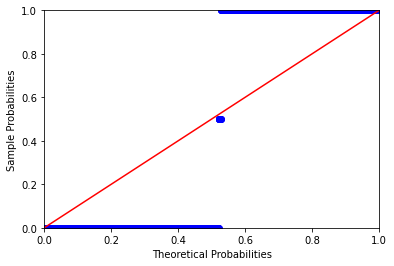

In [112]:
probplot = sm.ProbPlot(Model_4.resid)
plt.figure(figsize = (8,6))
probplot.ppplot(line = '45')
plt.show()

#### From above plot the residuals don't have a Normal Distribution since the RED & BLUE lines are far apart

## Test for Homoscedasticity

In [113]:
def get_standard_values(vals):
    return (vals - vals.mean()) / vals.std()

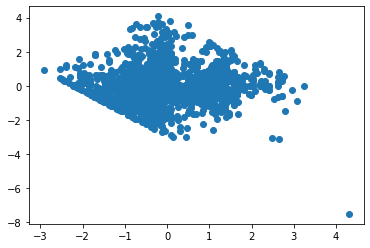

In [114]:
plt.scatter(get_standard_values(Model_4.fittedvalues), get_standard_values(Model_4.resid))

#### There is reverse relationship trend and plot is more concentrated to the bottom right of plot area

# MAKE PREDICTIONS

In [115]:
pred = Model_4.predict(test_X[sig_var3])

In [116]:
pred

229     11822.912665
2296     6800.477684
240     32452.039977
1616    22872.707348
1262    27093.197987
            ...     
1555    19792.199921
459      1700.062581
1516    25342.005773
761     22186.318568
45      15891.747507
Length: 477, dtype: float64

In [117]:
## Measure the RMSE value
np.sqrt(metrics.mean_squared_error(pred, test_Y))

6476.772418925373

In [118]:
## Measure R2 value
np.round(metrics.r2_score(pred, test_Y), 2)

0.3

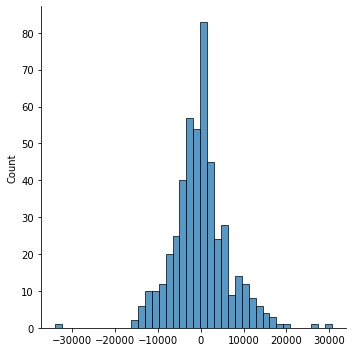

In [119]:
## Distribution plot: Pred vs Actual
sns.displot(test_Y - pred);

C:\Users\12146\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

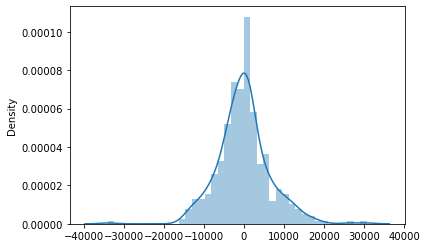

In [120]:
## Distribution plot: Pred vs Actual
sns.distplot(test_Y - pred)

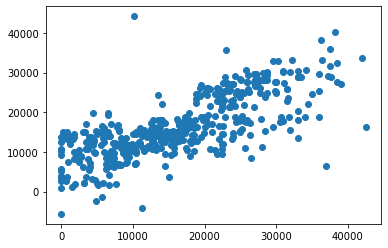

In [121]:
plt.scatter(test_Y, pred)